Wczytaj zbiór w `housing.csv`. Usuń wiersze zawierające brakujące wartości. Koduj zmienne kategoryczne metodą `get_dummies()`. Skaluj dane.
- Użyj [`KMeans()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) do grupowania zbioru.
- Stwórz wykres zależności WCSS (atrybut `inertia_`) od `n_clusters`. Na podstawie wykresu wybierz odpowiednią liczbę grup.
- Wizualizuj dane po grupowaniu. Stwórz na przykład wykres punktowy z `longitude` na osi x i `latitude` na osi y, gdzie kolor reprezentuje indeks grupy (dostępny w `labels_`).
- Grupuj zbiór przy pomocy [AgglomerativeClustering()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html). Liczbę grup reguluje parametr `n_clusters` lub `distance_threshold`. Porównaj wizualnie grupowania stworzone przez k-means i grupowanie aglomeracyjne.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

In [13]:
df = pd.read_csv('../data/housing.csv')

print(df.shape)
print(df.info())
df.head()

(20640, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
# Remove rows with missing values
df_cleaned = df.dropna()
print(df_cleaned.shape)

vis_longitude = df_cleaned['longitude']
vis_latitude = df_cleaned['latitude']

(20433, 10)


In [15]:
# Code categorical variables using one-hot encoding - get dummies
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

df_processed = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)
df_processed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [16]:
numerical_cols = df_processed.select_dtypes(include=np.number).columns

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_processed[numerical_cols])

df_scaled = pd.DataFrame(scaled_features, columns=numerical_cols, index=df_processed.index)
df_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418


In [17]:
wcss = []
# 1 to 10 clusters
cluster_range = range(1, 11)

X_cluster = df_scaled.copy()

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=17, n_init='auto')
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)

/Users/tomasz/Developer/EWD---Eksploracja-i-Wizualizacja-Danych/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/tomasz/Developer/EWD---Eksploracja-i-Wizualizacja-Danych/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/tomasz/Developer/EWD---Eksploracja-i-Wizualizacja-Danych/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/tomasz/Developer/EWD---Eksploracja-i-Wizualizacja-Danych/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/tomasz/Developer/EWD---Eksploracja-i-Wizualizacja-Danych/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current

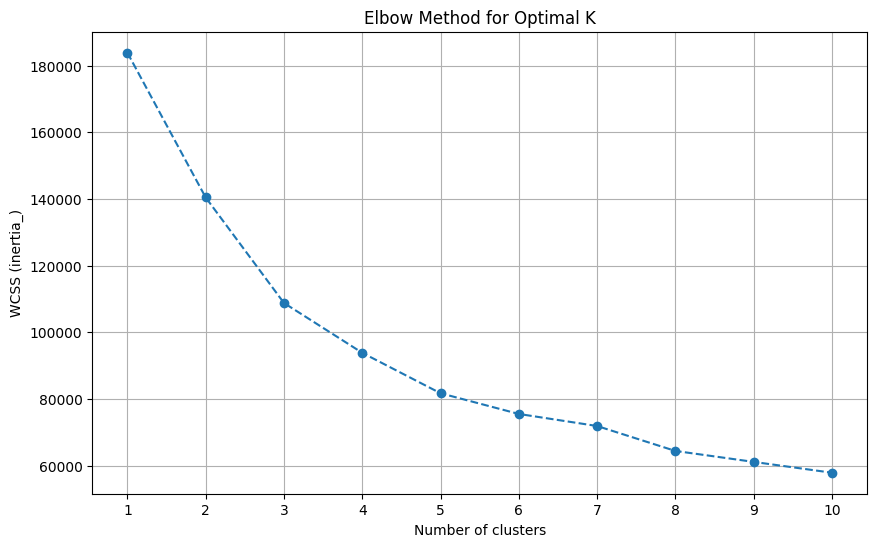

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (inertia_)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [19]:
optimal_n_clusters = 3

kmeans_final = KMeans(n_clusters=optimal_n_clusters, init='k-means++', random_state=17, n_init='auto')

df_visualization = pd.DataFrame({
    'longitude': vis_longitude,
    'latitude': vis_latitude,
    'kmeans_cluster': kmeans_final.fit_predict(X_cluster)
}, index=X_cluster.index)

/Users/tomasz/Developer/EWD---Eksploracja-i-Wizualizacja-Danych/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/tomasz/Developer/EWD---Eksploracja-i-Wizualizacja-Danych/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/tomasz/Developer/EWD---Eksploracja-i-Wizualizacja-Danych/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/tomasz/Developer/EWD---Eksploracja-i-Wizualizacja-Danych/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/tomasz/Developer/EWD---Eksploracja-i-Wizualizacja-Danych/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current

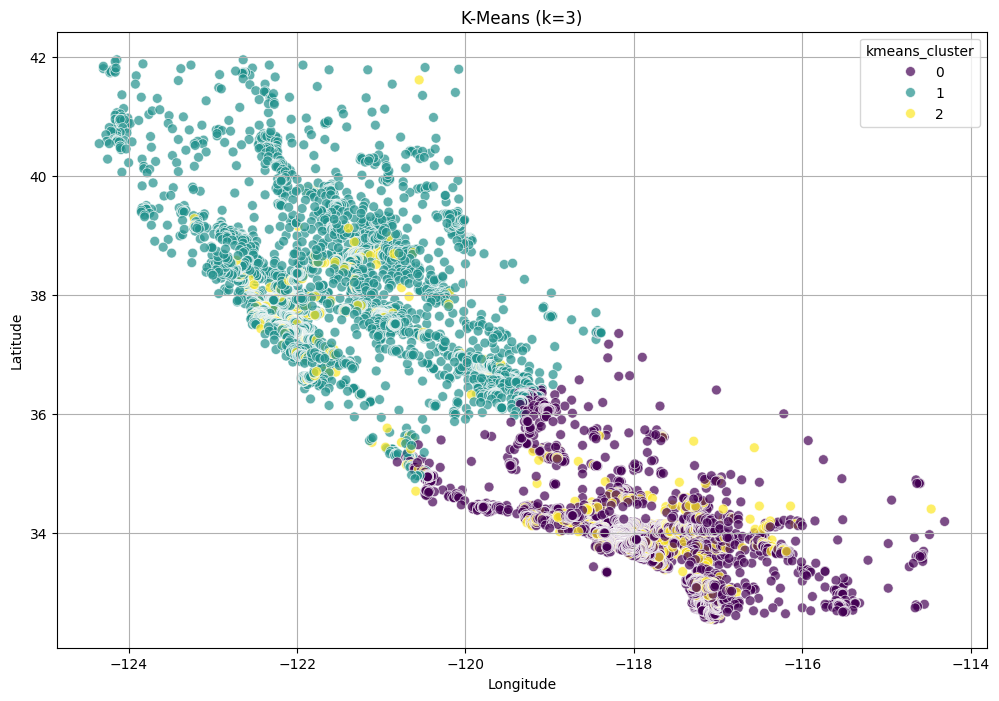

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_visualization, x='longitude', y='latitude', hue='kmeans_cluster', palette='viridis', legend='full', s=50, alpha=0.7)
plt.title(f'K-Means (k={optimal_n_clusters})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [21]:
agg_clustering = AgglomerativeClustering(n_clusters=optimal_n_clusters)
df_visualization['agg_cluster'] = agg_clustering.fit_predict(X_cluster)

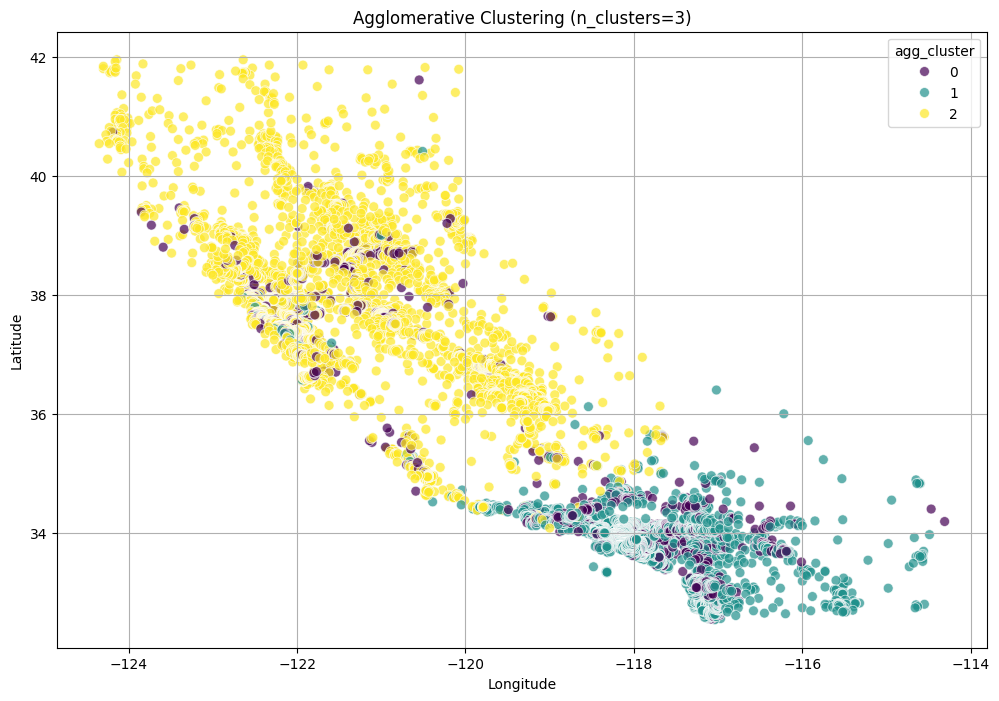

In [22]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_visualization, x='longitude', y='latitude', hue='agg_cluster', palette='viridis', legend='full', s=50, alpha=0.7)
plt.title(f'Agglomerative Clustering (n_clusters={optimal_n_clusters})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()